In [209]:
using Pkg; Pkg.activate("C:\\Users\\KarlH\\Desktop\\ComputationalPhysicsMaster\\Code\\OrbitalNeuralMethods")
using Revise
using OrbitalNeuralMethods
import OrbitalNeuralMethods as onm

  Activating project at `C:\Users\KarlH\Desktop\ComputationalPhysicsMaster\Code\OrbitalNeuralMethods`


In [237]:
n = 2

ω = 0.25
ham = HOCoulomb(ω, shielding = 0.25)
#ham = HarmonicOscillator(ω)

l = 10
basis = SpinBasis(HOBasis(l, ω));

In [238]:
grid = [x for x in range(-10, stop = 10, length = 2001)]
system = System(n, basis, grid, ham);

mixer = Alpha(0.5)
rhf = setup_RHF(system, mixer);
rhf = compute_ground_state!(rhf, max_iter = 1000, tol = 1e-10, verbose=0);
energy(rhf)

1.17957942722023

In [239]:
wf = Slater(rhf)

metro = Importance(equils = 1e4, samples = 2^20, step = 0.1);
#metro = Metropolis(equils = 1e4, samples = 1e5, step = 0.01);

In [240]:
result = blocking(wf, ham, metro, nthreads = 1);

digits = Integer(-floor(log10(result.E_err))) + 1
print("$(round(result.E, digits=digits)) ± $(round(result.E_err, digits=digits)), Δ = $(round(result.E - energy(rhf), digits=digits))")

1.1719 ± 0.0065, Δ = -0.0077

In [226]:
import Plots as plt

In [243]:
ob_result = onebody(wf, ham, metro, start = -3.5, stop = 3.5, length = 100, nthreads = 8);
(; radius, oneBodyDensity) = ob_result;

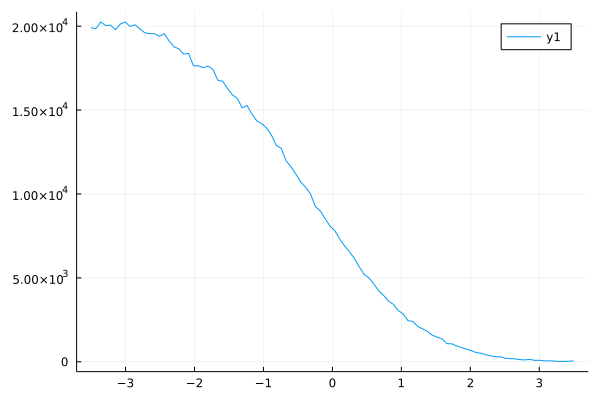

In [244]:
plt.plot(radius, oneBodyDensity)